In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [3]:
data = pd.read_csv("/content/web_traffic.csv")
print(data.head())

             Timestamp  TrafficCount
0  2020-01-20 00:00:00         487.0
1  2020-01-20 00:30:00         385.0
2  2020-01-20 01:30:00         269.0
3  2020-01-20 02:30:00         517.0
4  2020-01-20 03:30:00         129.0


In [4]:
print(data.tail())

                Timestamp  TrafficCount
2788  2020-05-17 08:30:00         521.0
2789  2020-05-17 09:30:00        1003.0
2790  2020-05-17 10:30:00        1442.0
2791  2020-05-17 11:30:00        1334.0
2792  2020-05-17 12:30:00         632.0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2793 non-null   object 
 1   TrafficCount  2793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.8+ KB
None


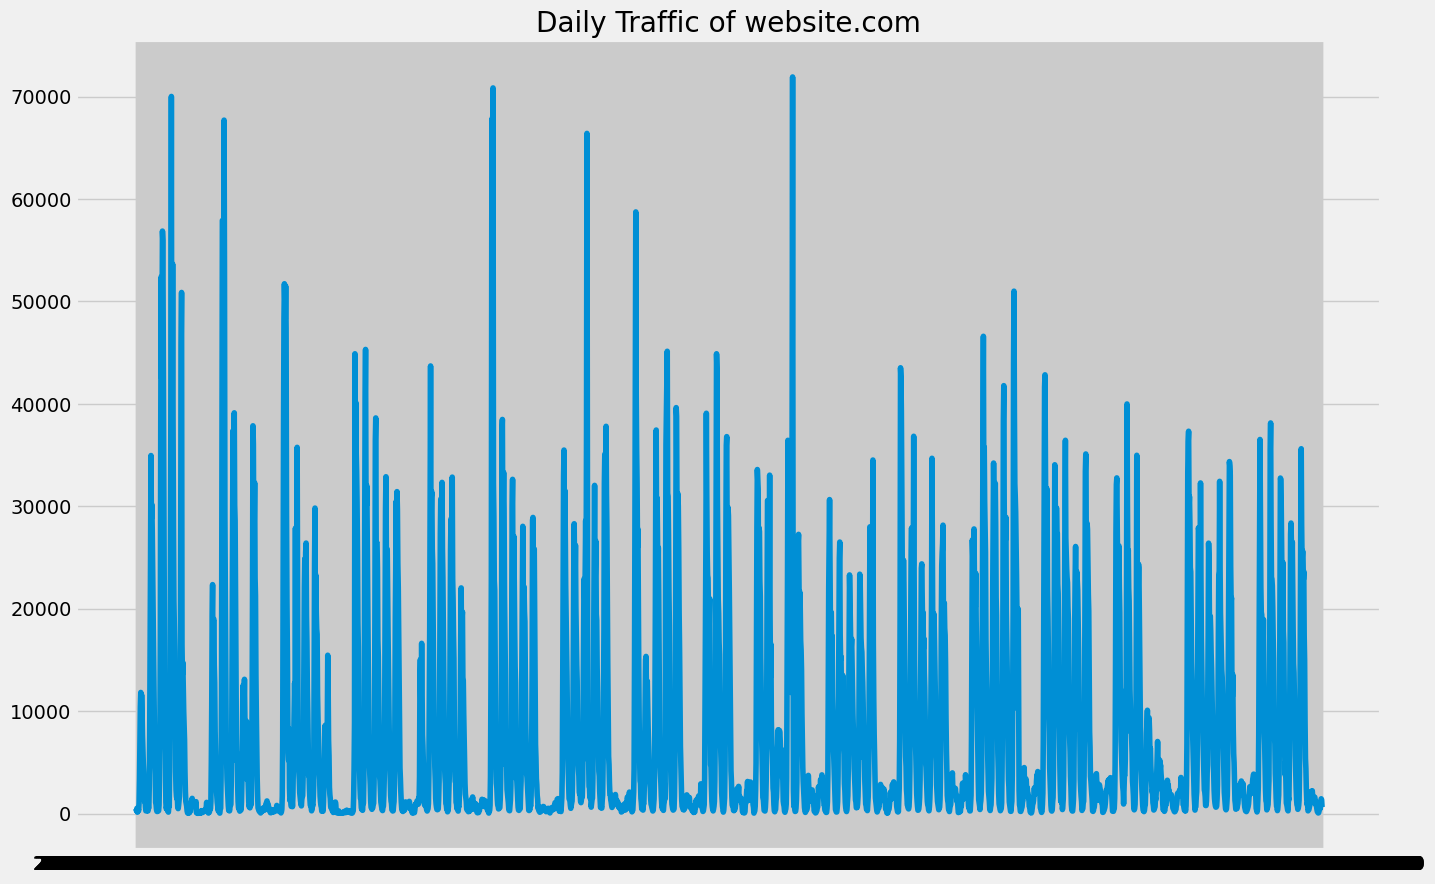

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15, 10))
plt.plot(data["Timestamp"], data["TrafficCount"])
plt.title("Daily Traffic of website.com")
plt.show()

<Figure size 640x480 with 0 Axes>

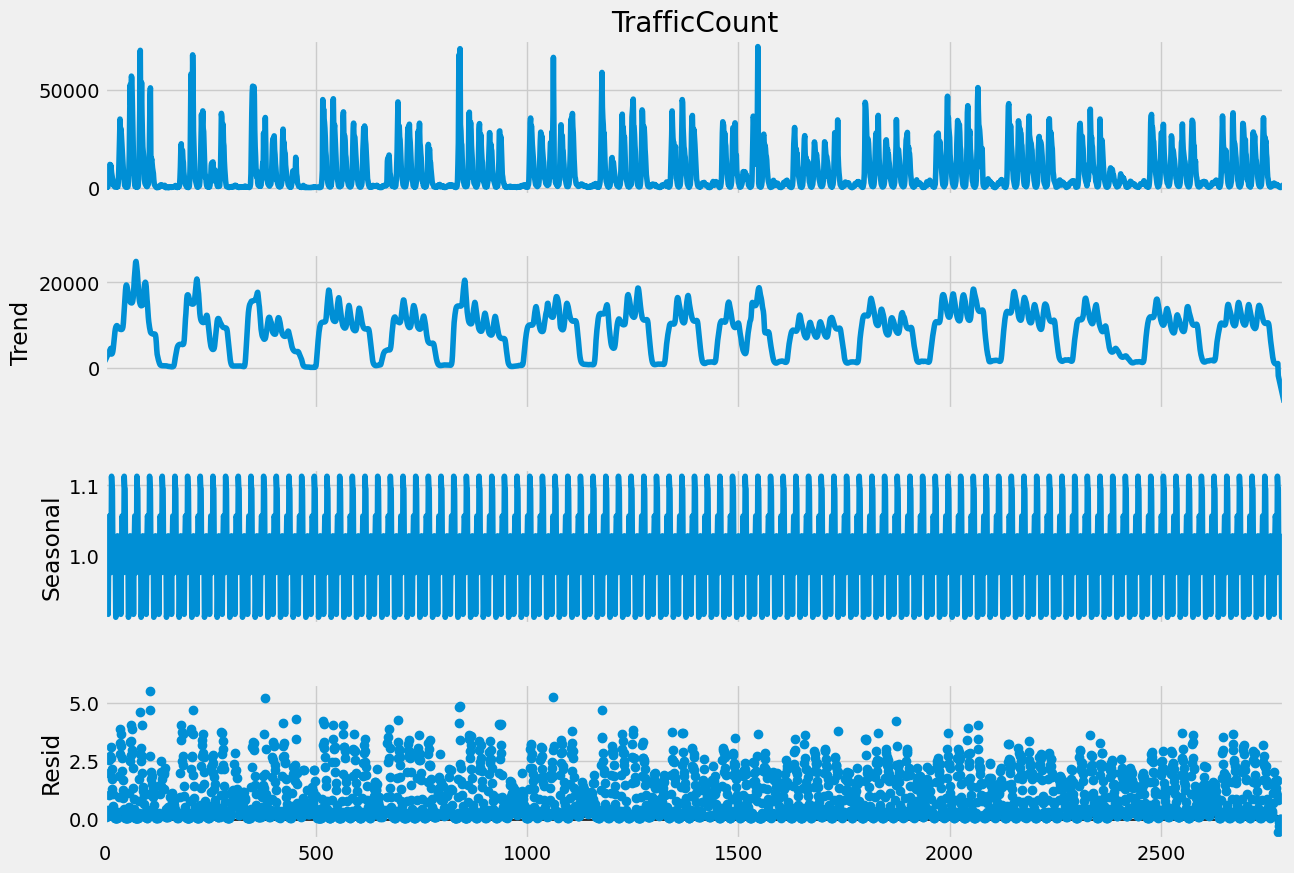

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["TrafficCount"], model = "multiplicative", extrapolate_trend='freq', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)


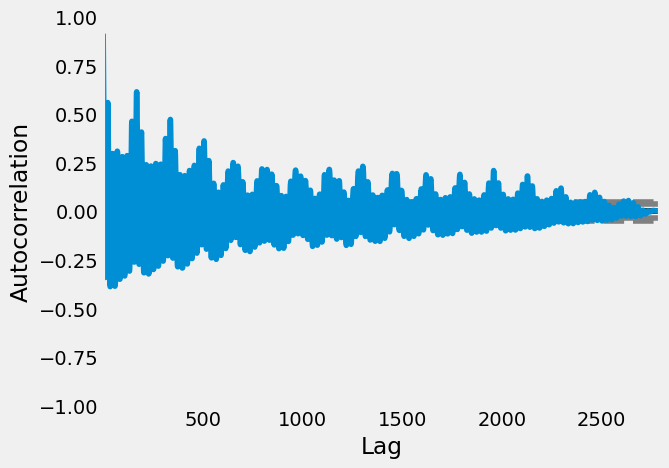

In [8]:
pd.plotting.autocorrelation_plot(data["TrafficCount"])
plt.show()

In [9]:
p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(data["TrafficCount"], order=(p,d,q), seasonal_order=(p,d,q,12))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       TrafficCount   No. Observations:                 2793
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood              -27557.721
Date:                            Fri, 28 Jun 2024   AIC                          55145.442
Time:                                    06:35:52   BIC                          55234.395
Sample:                                         0   HQIC                         55177.562
                                           - 2793                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2695      0.560     -2.265      0.024      -2.368      -0.171
ar.L2         -0.7046      0.433   

In [10]:
# Fit the SARIMAX model to your data
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data["TrafficCount"], order=(p, d, q), seasonal_order=(p, d, q, 12))
model_fit = model.fit()  # Obtain the fitted model

# Use the fitted model for prediction
predictions = model_fit.predict(len(data), len(data) + 50)  # Call predict on model_fit
print(predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2793     -513.642120
2794     -855.995462
2795    -1914.685884
2796    -2879.508319
2797    -3797.208915
2798    -4195.436861
2799    -5300.818916
2800    -6524.638587
2801    -7333.951523
2802    -7724.703331
2803    -8666.084507
2804    -9437.981626
2805    -9933.469948
2806   -10052.488157
2807   -10294.276485
2808   -10304.980823
2809    -9946.438785
2810    -9210.835968
2811    -7474.771905
2812    -4960.357004
2813    -1847.704444
2814      971.934728
2815     1071.568551
2816     -885.444596
2817    -2566.590188
2818    -2768.285903
2819    -3832.090767
2820    -4907.761377
2821    -6023.927183
2822    -6468.607228
2823    -7762.114670
2824    -9103.032396
2825    -9999.737121
2826   -10531.430436
2827   -11520.036680
2828   -12362.128059
2829   -12949.756239
2830   -13081.386117
2831   -13389.483959
2832   -13430.071986
2833   -13094.105268
2834   -12275.700365
2835   -10393.626546
2836    -7460.488935
2837    -3956.331077
2838     -789.332626
2839     -680.892644
2840    -2848

<Axes: >

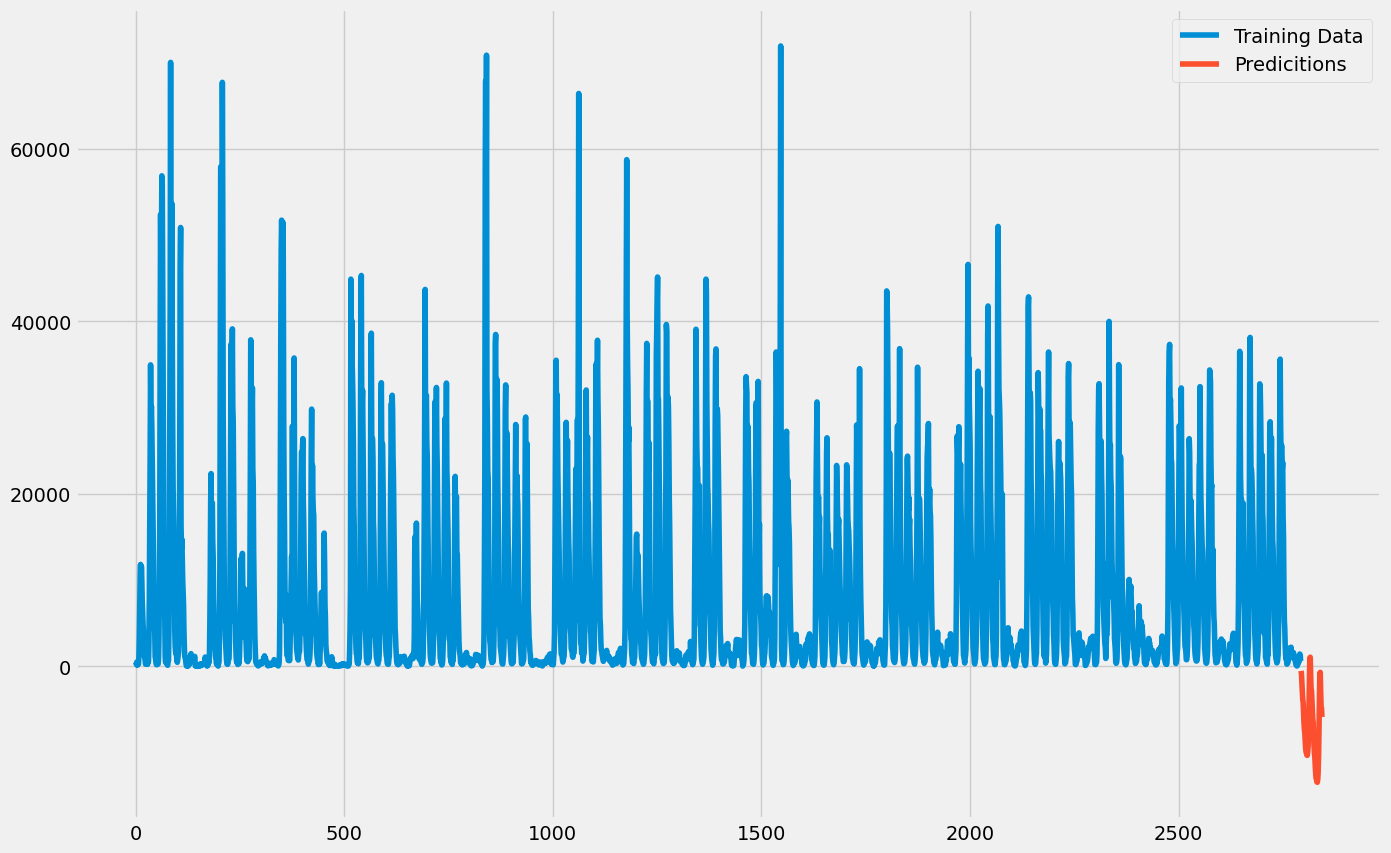

In [11]:
data["TrafficCount"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predicitions")